## training the model

In [1]:
%matplotlib inline
import tensorflow as tf
import keras
import collections
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import pydot
import random
import keras.backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import os
from PIL import Image
import PIL.ImageOps
from IPython.display import SVG
import scipy
import numpy as np

In [2]:
train_dataset = h5py.File("greek_dataset_20200722-5.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()

In [3]:
class_names=["alpha","beta","gamma","delta","epsilon","zeta","theta","eta",]
print("train:"+str(len(X_train)),"test:"+str(len(Y_test)))

train:6400 test:1600


In [4]:
print("number of traning examples = "+str(X_train.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))
train_data=(X_train,Y_train)
test_data=(X_test,Y_test)

number of traning examples = 6400
number of test examples = 1600
X_train shape:(6400, 10, 10, 1)
Y_train shape:(6400, 1)
X_test shape:(1600, 10, 10, 1)
Y_test shape:(1600, 1)


# Build A model

In [5]:
#Build a model
def Pimodel(input_shape):
    X_input = Input(shape=input_shape)
    X=ZeroPadding2D(padding=(1,1))(X_input)
    X=Conv2D(1,kernel_size=(3,6),strides=(3,6),use_bias=None)(X)
    X=Activation('relu')(X)
    X=Flatten()(X)
    Y=Activation('softmax')(X)
    model=Model(inputs=X_input,outputs=Y,name="JSmodel")
    return model

In [6]:
picmodel = Pimodel((10,10,1))

In [7]:
picmodel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 2, 1)           18        
_________________________________________________________________
activation (Activation)      (None, 4, 2, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [9]:
history=picmodel.fit(x=X_train,y=Y_train,batch_size=150,epochs=1000,validation_data=(X_test,Y_test)) 

Epoch 1/1000
43/43 [==============================] - 0s 9ms/step - loss: 2.1511 - accuracy: 0.0316 - val_loss: 2.1210 - val_accuracy: 0.0575
Epoch 2/1000
43/43 [==============================] - 0s 4ms/step - loss: 2.0861 - accuracy: 0.1250 - val_loss: 2.0513 - val_accuracy: 0.1900
Epoch 3/1000
43/43 [==============================] - 0s 4ms/step - loss: 2.0073 - accuracy: 0.2556 - val_loss: 1.9618 - val_accuracy: 0.3250
Epoch 4/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.9131 - accuracy: 0.3594 - val_loss: 1.8760 - val_accuracy: 0.3869
Epoch 5/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.8356 - accuracy: 0.3977 - val_loss: 1.8084 - val_accuracy: 0.3956
Epoch 6/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.7746 - accuracy: 0.4036 - val_loss: 1.7559 - val_accuracy: 0.4125
Epoch 7/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.7246 - accuracy: 0.4150 - val_loss: 1.7079 - val_accuracy: 0.4269
Epoch 

43/43 [==============================] - 0s 4ms/step - loss: 0.8082 - accuracy: 0.7720 - val_loss: 0.8087 - val_accuracy: 0.7756
Epoch 59/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.8015 - accuracy: 0.7734 - val_loss: 0.8018 - val_accuracy: 0.7794
Epoch 60/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.7948 - accuracy: 0.7764 - val_loss: 0.7952 - val_accuracy: 0.7800
Epoch 61/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.7884 - accuracy: 0.7786 - val_loss: 0.7887 - val_accuracy: 0.7806
Epoch 62/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.7794 - val_loss: 0.7822 - val_accuracy: 0.7819
Epoch 63/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.7873 - val_loss: 0.7759 - val_accuracy: 0.7925
Epoch 64/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.7697 - accuracy: 0.7912 - val_loss: 0.7698 - val_accuracy: 0.7950
Epoch 65/1000

43/43 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.8423 - val_loss: 0.5664 - val_accuracy: 0.8419
Epoch 116/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.8433 - val_loss: 0.5638 - val_accuracy: 0.8462
Epoch 117/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.8438 - val_loss: 0.5613 - val_accuracy: 0.8469
Epoch 118/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8445 - val_loss: 0.5587 - val_accuracy: 0.8481
Epoch 119/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.8450 - val_loss: 0.5561 - val_accuracy: 0.8487
Epoch 120/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8453 - val_loss: 0.5536 - val_accuracy: 0.8487
Epoch 121/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.8452 - val_loss: 0.5512 - val_accuracy: 0.8469
Epoch 1

Epoch 172/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.8661 - val_loss: 0.4586 - val_accuracy: 0.8650
Epoch 173/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8659 - val_loss: 0.4573 - val_accuracy: 0.8669
Epoch 174/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8697 - val_loss: 0.4560 - val_accuracy: 0.8700
Epoch 175/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.8711 - val_loss: 0.4547 - val_accuracy: 0.8694
Epoch 176/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.8691 - val_loss: 0.4533 - val_accuracy: 0.8706
Epoch 177/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.8698 - val_loss: 0.4520 - val_accuracy: 0.8700
Epoch 178/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8695 - val_loss: 0.4508 - val_accuracy:

Epoch 229/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8959 - val_loss: 0.3978 - val_accuracy: 0.8881
Epoch 230/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8973 - val_loss: 0.3969 - val_accuracy: 0.8881
Epoch 231/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8958 - val_loss: 0.3961 - val_accuracy: 0.8863
Epoch 232/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8961 - val_loss: 0.3953 - val_accuracy: 0.8913
Epoch 233/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8992 - val_loss: 0.3944 - val_accuracy: 0.8913
Epoch 234/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8980 - val_loss: 0.3936 - val_accuracy: 0.8894
Epoch 235/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8984 - val_loss: 0.3928 - val_accuracy:

Epoch 286/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3510 - accuracy: 0.9077 - val_loss: 0.3585 - val_accuracy: 0.9013
Epoch 287/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.9086 - val_loss: 0.3580 - val_accuracy: 0.9025
Epoch 288/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.9098 - val_loss: 0.3574 - val_accuracy: 0.9025
Epoch 289/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.9095 - val_loss: 0.3568 - val_accuracy: 0.9031
Epoch 290/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.9103 - val_loss: 0.3563 - val_accuracy: 0.9031
Epoch 291/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.9103 - val_loss: 0.3558 - val_accuracy: 0.9031
Epoch 292/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.9109 - val_loss: 0.3553 - val_accuracy:

Epoch 343/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.9142 - val_loss: 0.3325 - val_accuracy: 0.9100
Epoch 344/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.9142 - val_loss: 0.3321 - val_accuracy: 0.9112
Epoch 345/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.9147 - val_loss: 0.3318 - val_accuracy: 0.9112
Epoch 346/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.9147 - val_loss: 0.3314 - val_accuracy: 0.9112
Epoch 347/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.9145 - val_loss: 0.3310 - val_accuracy: 0.9112
Epoch 348/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.9150 - val_loss: 0.3306 - val_accuracy: 0.9112
Epoch 349/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.9148 - val_loss: 0.3303 - val_accuracy:

Epoch 400/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.9200 - val_loss: 0.3146 - val_accuracy: 0.9169
Epoch 401/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.9202 - val_loss: 0.3143 - val_accuracy: 0.9169
Epoch 402/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.9202 - val_loss: 0.3140 - val_accuracy: 0.9169
Epoch 403/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.9202 - val_loss: 0.3138 - val_accuracy: 0.9169
Epoch 404/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.9203 - val_loss: 0.3136 - val_accuracy: 0.9169
Epoch 405/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3007 - accuracy: 0.9206 - val_loss: 0.3132 - val_accuracy: 0.9169
Epoch 406/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.9208 - val_loss: 0.3130 - val_accuracy:

Epoch 457/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2878 - accuracy: 0.9217 - val_loss: 0.3018 - val_accuracy: 0.9169
Epoch 458/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2876 - accuracy: 0.9220 - val_loss: 0.3015 - val_accuracy: 0.9187
Epoch 459/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.9223 - val_loss: 0.3014 - val_accuracy: 0.9187
Epoch 460/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2872 - accuracy: 0.9219 - val_loss: 0.3012 - val_accuracy: 0.9175
Epoch 461/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.9223 - val_loss: 0.3010 - val_accuracy: 0.9187
Epoch 462/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.9222 - val_loss: 0.3008 - val_accuracy: 0.9187
Epoch 463/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.9225 - val_loss: 0.3006 - val_accuracy:

Epoch 514/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2774 - accuracy: 0.9253 - val_loss: 0.2925 - val_accuracy: 0.9200
Epoch 515/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.9244 - val_loss: 0.2923 - val_accuracy: 0.9200
Epoch 516/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2771 - accuracy: 0.9228 - val_loss: 0.2923 - val_accuracy: 0.9200
Epoch 517/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.9234 - val_loss: 0.2921 - val_accuracy: 0.9212
Epoch 518/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9233 - val_loss: 0.2920 - val_accuracy: 0.9200
Epoch 519/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9231 - val_loss: 0.2919 - val_accuracy: 0.9200
Epoch 520/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.9245 - val_loss: 0.2917 - val_accuracy:

Epoch 571/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.9291 - val_loss: 0.2858 - val_accuracy: 0.9250
Epoch 572/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2696 - accuracy: 0.9291 - val_loss: 0.2857 - val_accuracy: 0.9250
Epoch 573/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.9281 - val_loss: 0.2856 - val_accuracy: 0.9244
Epoch 574/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.9289 - val_loss: 0.2855 - val_accuracy: 0.9250
Epoch 575/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.9284 - val_loss: 0.2854 - val_accuracy: 0.9256
Epoch 576/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.9292 - val_loss: 0.2853 - val_accuracy: 0.9256
Epoch 577/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.9292 - val_loss: 0.2852 - val_accuracy:

Epoch 628/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.9322 - val_loss: 0.2808 - val_accuracy: 0.9306
Epoch 629/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9323 - val_loss: 0.2807 - val_accuracy: 0.9306
Epoch 630/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.9322 - val_loss: 0.2806 - val_accuracy: 0.9306
Epoch 631/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9322 - val_loss: 0.2806 - val_accuracy: 0.9306
Epoch 632/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.9322 - val_loss: 0.2805 - val_accuracy: 0.9306
Epoch 633/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9322 - val_loss: 0.2804 - val_accuracy: 0.9312
Epoch 634/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9322 - val_loss: 0.2803 - val_accuracy:

Epoch 685/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.9330 - val_loss: 0.2770 - val_accuracy: 0.9312
Epoch 686/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.9331 - val_loss: 0.2770 - val_accuracy: 0.9312
Epoch 687/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9330 - val_loss: 0.2769 - val_accuracy: 0.9312
Epoch 688/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9330 - val_loss: 0.2768 - val_accuracy: 0.9312
Epoch 689/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9330 - val_loss: 0.2768 - val_accuracy: 0.9312
Epoch 690/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9330 - val_loss: 0.2767 - val_accuracy: 0.9312
Epoch 691/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.9331 - val_loss: 0.2767 - val_accuracy:

Epoch 742/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9336 - val_loss: 0.2743 - val_accuracy: 0.9325
Epoch 743/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9337 - val_loss: 0.2742 - val_accuracy: 0.9325
Epoch 744/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9337 - val_loss: 0.2742 - val_accuracy: 0.9325
Epoch 745/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9337 - val_loss: 0.2742 - val_accuracy: 0.9325
Epoch 746/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9341 - val_loss: 0.2741 - val_accuracy: 0.9325
Epoch 747/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9336 - val_loss: 0.2741 - val_accuracy: 0.9325
Epoch 748/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2552 - accuracy: 0.9336 - val_loss: 0.2740 - val_accuracy:

Epoch 799/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.9337 - val_loss: 0.2723 - val_accuracy: 0.9319
Epoch 800/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.9330 - val_loss: 0.2722 - val_accuracy: 0.9331
Epoch 801/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.9345 - val_loss: 0.2721 - val_accuracy: 0.9331
Epoch 802/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9341 - val_loss: 0.2722 - val_accuracy: 0.9331
Epoch 803/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9348 - val_loss: 0.2721 - val_accuracy: 0.9331
Epoch 804/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9345 - val_loss: 0.2721 - val_accuracy: 0.9331
Epoch 805/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9331 - val_loss: 0.2721 - val_accuracy:

Epoch 856/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9342 - val_loss: 0.2706 - val_accuracy: 0.9331
Epoch 857/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2503 - accuracy: 0.9342 - val_loss: 0.2706 - val_accuracy: 0.9319
Epoch 858/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9348 - val_loss: 0.2706 - val_accuracy: 0.9331
Epoch 859/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9334 - val_loss: 0.2706 - val_accuracy: 0.9319
Epoch 860/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.9348 - val_loss: 0.2705 - val_accuracy: 0.9331
Epoch 861/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9350 - val_loss: 0.2705 - val_accuracy: 0.9331
Epoch 862/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9348 - val_loss: 0.2705 - val_accuracy:

Epoch 913/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9341 - val_loss: 0.2695 - val_accuracy: 0.9331
Epoch 914/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9341 - val_loss: 0.2695 - val_accuracy: 0.9319
Epoch 915/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9337 - val_loss: 0.2695 - val_accuracy: 0.9319
Epoch 916/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9356 - val_loss: 0.2694 - val_accuracy: 0.9331
Epoch 917/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9352 - val_loss: 0.2694 - val_accuracy: 0.9331
Epoch 918/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9347 - val_loss: 0.2694 - val_accuracy: 0.9331
Epoch 919/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9359 - val_loss: 0.2694 - val_accuracy:

Epoch 970/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9353 - val_loss: 0.2687 - val_accuracy: 0.9331
Epoch 971/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.9341 - val_loss: 0.2687 - val_accuracy: 0.9319
Epoch 972/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9342 - val_loss: 0.2686 - val_accuracy: 0.9319
Epoch 973/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9353 - val_loss: 0.2686 - val_accuracy: 0.9337
Epoch 974/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9358 - val_loss: 0.2686 - val_accuracy: 0.9337
Epoch 975/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9356 - val_loss: 0.2686 - val_accuracy: 0.9325
Epoch 976/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.9355 - val_loss: 0.2686 - val_accuracy:

In [10]:
preds = picmodel.evaluate(x=X_test,y=Y_test)
print('Test Loss=' + str(preds[0]))
print("Test Accuracy ="+str(preds[1]))

50/50 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.9319
Test Loss=0.2683502435684204
Test Accuracy =0.9318749904632568


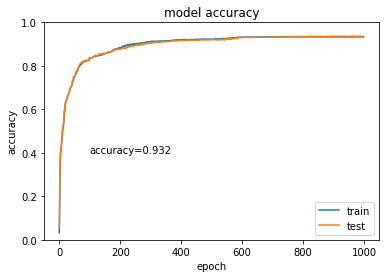

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.text(100,0.4,"accuracy="+str(round(preds[1],3)))
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='best')
plt.show()
#plt.savefig("accuary.png")

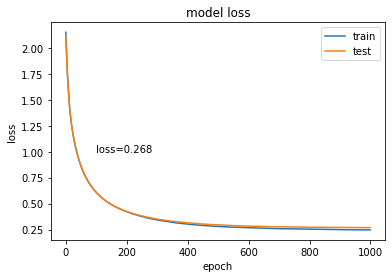

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.text(100,1,"loss="+str(round(preds[0],3)))
plt.legend(['train', 'test'], loc="best")
plt.show()
#plt.savefig("loss.png")

## Check the weight and bias

In [13]:
picmodel=load_model("./greek_model_20200729.h5")

In [14]:
kernel_weights=np.squeeze(picmodel.get_weights())
#print(kernel_weights.flatten())
a1=np.squeeze(kernel_weights)[0:3,0:6].flatten()
print(kernel_weights)
N=abs(a1.flatten())[np.argmax(abs(a1.flatten()))]
print(N)
a1_nor=a1.flatten()/N
print(a1_nor)

[[-21.175821     6.5087824    6.4827213    6.465539     1.1323564
   -3.029318  ]
 [-10.920926   -16.462433    -2.4777129   -3.1956909    5.105433
   -5.0322585 ]
 [  2.1264365    3.990209    -5.338956     5.873        3.4312232
   -0.29767105]]
21.175821
[-1.          0.3073686   0.3061379   0.3053265   0.05347402 -0.14305551
 -0.5157262  -0.7774165  -0.1170067  -0.15091226  0.24109729 -0.23764172
  0.10041814  0.18843232 -0.25212508  0.2773446   0.16203494 -0.01405712]


In [15]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_1 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

## the layer output 

In [16]:
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

In [17]:
#check the output of "alpha"
path="./twolayerdata_greek/alpha/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
one_t=[]
One_t=[]
fn_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/alpha/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    one_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="alpha":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        fn_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        One_t.append(elef) 
one1=collections.Counter(one_t)
print(len(one_t),collections.Counter(one_t))

1000 Counter({'alpha': 856, 'epsilon': 103, 'gamma': 26, 'beta': 11, 'zeta': 3, 'delta': 1})


In [18]:
path="./twolayerdata_greek/beta/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
two_t=[]
Two_t=[]
beta_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/beta/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    two_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="beta":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        beta_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Two_t.append(elef)
two1=collections.Counter(two_t)
print(len(two_t),collections.Counter(two_t))

1000 Counter({'beta': 970, 'zeta': 14, 'gamma': 6, 'eta': 6, 'epsilon': 2, 'delta': 1, 'alpha': 1})


In [19]:
path="./twolayerdata_greek/gamma/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
three_t=[]
Three_t=[]
gamma_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/gamma/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    three_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="gamma":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        gamma_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Three_t.append(elef)
three1=collections.Counter(three_t)
print(len(three_t),collections.Counter(three_t))

1000 Counter({'gamma': 935, 'epsilon': 52, 'alpha': 8, 'beta': 5})


In [20]:
path="./twolayerdata_greek/delta/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
four_t=[]
Four_t=[]
delta_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/delta/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    four_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_2)]=="delta":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        delta_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Four_t.append(elef)
four1=collections.Counter(four_t)
print(len(four_t),collections.Counter(four_t))

1000 Counter({'delta': 943, 'gamma': 17, 'beta': 12, 'zeta': 12, 'eta': 11, 'alpha': 4, 'epsilon': 1})


In [21]:
path="./twolayerdata_greek/epsilon/"
imlist=os.listdir(path)
D=[]
five_t=[]
Five_t=[]
epsilon_t=[]
for elef in imlist:
    #print(elef)
    input_y=np.load("./twolayerdata_greek/epsilon/"+elef,allow_pickle=True)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    five_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="epsilon":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        epsilon_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Five_t.append(elef)
five1=collections.Counter(five_t)
print(len(five_t),collections.Counter(five_t))

1000 Counter({'epsilon': 966, 'gamma': 15, 'beta': 12, 'delta': 4, 'zeta': 2, 'alpha': 1})


In [22]:
path="./twolayerdata_greek/zeta/"
imlist=os.listdir(path)

#rmlist=random.sample(imlist,1000)
six_t=[]
Six_t=[]
zeta_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/zeta/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    six_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="zeta":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        zeta_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Six_t.append(elef)
six1=collections.Counter(six_t)
print(len(six_t),collections.Counter(six_t))

1000 Counter({'zeta': 973, 'beta': 20, 'delta': 3, 'alpha': 2, 'epsilon': 2})


In [24]:
path="./twolayerdata_greek/eta/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
seven_t=[]
Seven_t=[]
eta_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/eta/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    seven_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="eta":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        eta_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Seven_t.append(elef)
seven1=collections.Counter(seven_t)
print(len(seven_t),collections.Counter(seven_t))

1000 Counter({'eta': 950, 'gamma': 35, 'epsilon': 9, 'zeta': 5, 'delta': 1})


In [25]:
path="./twolayerdata_greek/theta/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
eight_t=[]
Eight_t=[]
theta_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_greek/theta/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    eight_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="theta":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        theta_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Eight_t.append(elef)
eight1=collections.Counter(eight_t)
print(len(eight_t),collections.Counter(eight_t))

1000 Counter({'theta': 878, 'epsilon': 45, 'gamma': 41, 'delta': 22, 'zeta': 10, 'alpha': 3, 'eta': 1})


# output the model accuracy on every character

C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3

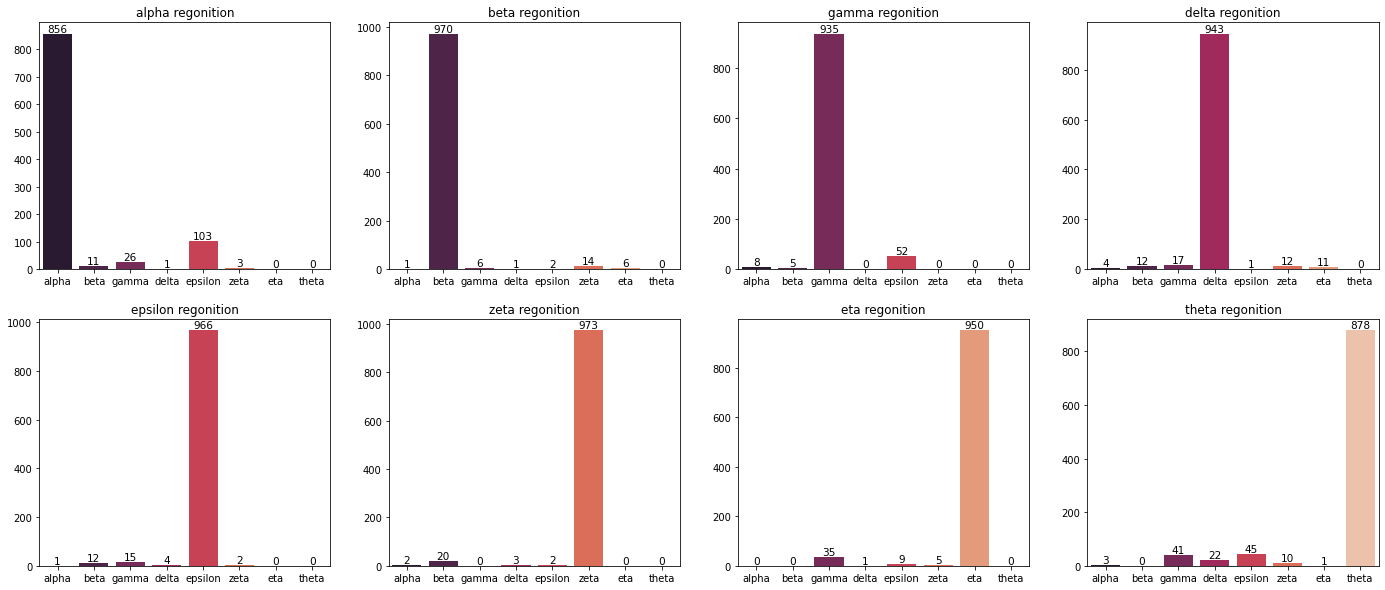

In [26]:
import pandas as pd
import seaborn as sns
#dict1 = pd.DataFrame(pd.Series(f1),columns=["numbers"],index=["fire","soil","water","wood","gas","sky","human","life"])
x=["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"]
dict1=pd.Series(one1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict1=dict1.fillna(0)
#print(dict1)
#print(dict1.fillna(0))
#dict1[np.squeeze(np.argwhere(np.isnan(dict1)))]=0

dict2=pd.Series(two1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
#dict2[np.squeeze(np.argwhere(np.isnan(dict2)))]=0
dict2=dict2.fillna(0)
dict3=pd.Series(three1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict3=dict3.fillna(0)
#dict3[np.squeeze(np.argwhere(np.isnan(dict3)))]=0
dict4=pd.Series(four1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict4=dict4.fillna(0)
#dict4[np.squeeze(np.argwhere(np.isnan(dict4)))]=0
dict5=pd.Series(five1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict5=dict5.fillna(0)
#dict5[np.squeeze(np.argwhere(np.isnan(dict5)))]=0
dict6=pd.Series(six1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict6=dict6.fillna(0)
#dict6[np.squeeze(np.argwhere(np.isnan(dict6)))]=0
dict7=pd.Series(seven1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict7=dict7.fillna(0)
#dict7[np.squeeze(np.argwhere(np.isnan(dict7)))]=0
dict8=pd.Series(eight1).reindex(["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
dict8=dict8.fillna(0)
#dict8[np.squeeze(np.argwhere(np.isnan(dict8)))]=0
plt.figure(figsize=(24,10))

plt.subplot(241)
sns.barplot(x,y=dict1,palette="rocket")
for i,j in zip(range(8), dict1):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#plt.bar(x,dict1,color="red")
plt.title("alpha regonition")

plt.subplot(242)
sns.barplot(x,dict2,palette="rocket")
plt.title("beta regonition")
for i,j in zip(range(8), dict2):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict2)

plt.subplot(243)
#plt.bar(x,dict3,color="brown")
sns.barplot(x,dict3,palette="rocket")
plt.title("gamma regonition")
for i,j in zip(range(8), dict3):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)

plt.subplot(244)
#plt.bar(x,dict4,color="blue")
sns.barplot(x,dict4,palette="rocket")
plt.title("delta regonition")
for i,j in zip(range(8), dict4):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(245)
#plt.bar(x,dict5,color="green")
sns.barplot(x,dict5,palette="rocket")
plt.title("epsilon regonition")
for i,j in zip(range(8), dict5):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(246)
#plt.bar(x,dict6,color="orange")
sns.barplot(x,dict6,palette="rocket")
plt.title("zeta regonition")
for i,j in zip(range(8), dict6):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(247)
#plt.bar(x,dict7,color="black")
sns.barplot(x=x, y=dict7, palette="rocket")
plt.title("eta regonition")
for i,j in zip(range(8), dict7):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(248)
#plt.bar(x,dict8,color="purple")
sns.barplot(x,dict8,palette="rocket")
plt.title("theta regonition")
for i,j in zip(range(8), dict8):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
#list1=dict1.values.tolist()
plt.show()
#plt.savefig("regonition.png")